In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import scipy.io
import scipy as sp
import theano.tensor as th
from scipy.stats import pearsonr

In [4]:
def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    
    result = a[np.where((a >= quartileSet[0]) & (a <= quartileSet[1]))]
    
    return np.array(result.tolist())

In [5]:
phantom_data=scipy.io.loadmat('scanner data/Scanner_3TSKYRA_MGH.mat')

In [5]:
phantom_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jan  5 04:59:21 2021',
 '__version__': '1.0',
 '__globals__': [],
 'ground_truth': array([[ 835.10879388,  833.41897485,  838.34265833, ...,  838.34265833,
          831.56272655,  830.18548258],
        [ 871.49606089,  871.06793053,  871.73861031, ...,  871.73861031,
          870.09203112,  865.47466757],
        [ 838.8405145 ,  840.5165299 ,  836.17924523, ...,  836.17924523,
          842.99758531,  850.00119903],
        ...,
        [6429.6154001 , 6389.40709126, 6366.65794541, ..., 6334.94814964,
         6372.58978653, 6348.72196741],
        [6319.37038359, 6371.4297444 , 6399.50661225, ..., 6430.99846826,
         6392.47730672, 6418.9571037 ],
        [6527.34966562, 6472.57530811, 6436.58725652, ..., 6389.78671612,
         6445.66382761, 6410.27705319]]),
 'measured': array([[ 832.22790889,  822.23189274,  851.23588628, ...,  786.33146446,
          796.34123757,  798.35102037],
        [ 876.29231968,

In [6]:
gt = phantom_data["ground_truth"]
fmri = phantom_data["measured"]
print(gt.shape,fmri.shape)

(5245, 600) (5245, 600)


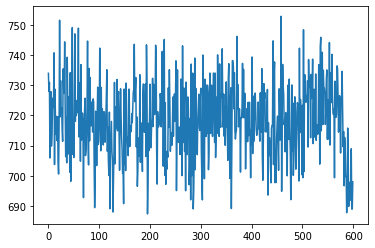

In [7]:
plt.plot(fmri[300])

(-0.10455351238673774, 0.010385757853373957)


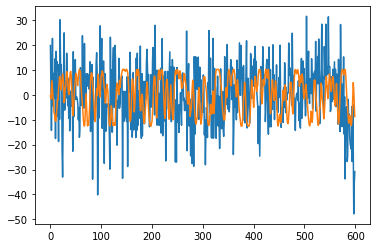

In [8]:
index=600
fmri_norm = fmri[index]-fmri[index].mean()
gt_norm = gt[index]-gt[index].mean()
plt.plot(fmri_norm)
plt.plot(gt_norm)
print(pearsonr(fmri_norm,gt_norm))

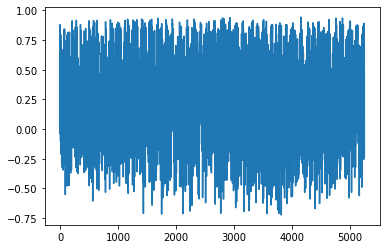

In [7]:
fmri_gt_pearsonr = [pearsonr(f,g)[0] for f,g in zip(fmri,gt)]
fmri_gt_pearsonr = np.array(fmri_gt_pearsonr)
plt.plot(fmri_gt_pearsonr)

(array([ 44., 161., 368., 674., 846., 947., 780., 546., 480., 399.]),
 array([-0.72393652, -0.5573533 , -0.39077008, -0.22418686, -0.05760365,
         0.10897957,  0.27556279,  0.442146  ,  0.60872922,  0.77531244,
         0.94189566]),
 <BarContainer object of 10 artists>)

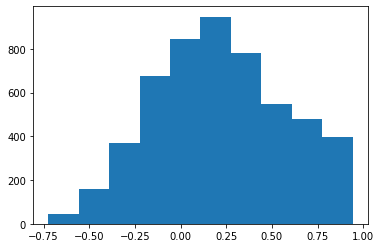

In [10]:
plt.hist(fmri_gt_pearsonr)

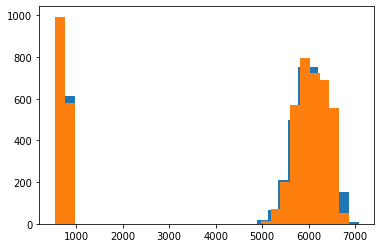

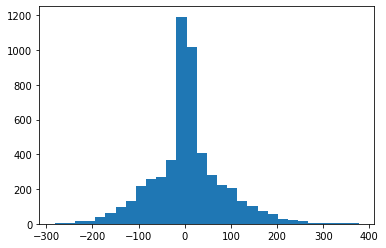

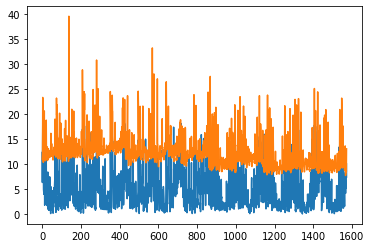

In [8]:
gt_mean = np.mean(gt,axis=1)
fmri_mean = np.mean(fmri,axis=1)
gt_std = np.std(gt,axis=1)
fmri_std = np.std(fmri,axis=1)
fmri_minus_gt = gt_mean-fmri_mean
plt.figure()
plt.hist(fmri_mean,bins=30)
plt.hist(gt_mean,bins=30)
plt.figure()
plt.hist(fmri_minus_gt,bins=30)
plt.figure()
plt.plot(gt_std[:1573])
plt.plot(fmri_std[:1573])

In [9]:
gt_mean = np.mean(gt,axis=1)
fmri_mean = np.mean(fmri,axis=1)
print(gt_mean.shape)
gt_std = np.std(gt,axis=1)
fmri_std = np.std(fmri,axis=1)
gt_skew = sp.stats.skew(gt,axis=1)
fmri_skew = sp.stats.skew(fmri,axis=1)

gt_nooutliers = removeOutliers(gt_skew,1.5)
fmri_nooutliers = removeOutliers(fmri_skew,4.0)
print(len(gt_skew)-len(gt_nooutliers),len(fmri_skew)-len(fmri_nooutliers))

skew_idx = np.argsort(gt_nooutliers)

(5245,)
10 50


In [48]:
# even though the data is expected to be normalized, we just want to make sure
gt_norm = (gt - gt_mean[:,np.newaxis])
fmri_norm = (fmri - fmri_mean[:,np.newaxis])
print(gt_norm.shape)

(5245, 600)


2 12


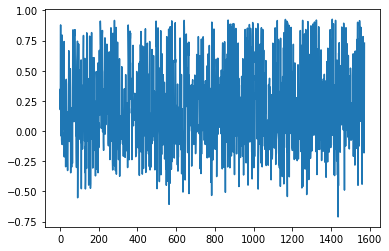

In [15]:
gt1 = gt[:1573]
fmri1 = fmri[:1573]
gt1_mean = np.mean(gt1,axis=1)
fmri1_mean = np.mean(fmri1,axis=1)
gt1_norm = (gt1 - gt1_mean[:,np.newaxis])
fmri1_norm = (fmri1 - fmri1_mean[:,np.newaxis])

gt1_skew = sp.stats.skew(gt1,axis=1)
fmri1_skew = sp.stats.skew(fmri1,axis=1)

gt1_nooutliers = removeOutliers(gt1_skew,1.5)
fmri1_nooutliers = removeOutliers(fmri1_skew,4.0)
print(len(gt1_skew)-len(gt1_nooutliers),len(fmri1_skew)-len(fmri1_nooutliers))

skew1_idx = np.argsort(gt1_nooutliers)

fmri_gt_pearsonr1 = [pearsonr(f,g)[0] for f,g in zip(fmri1,gt1)]
fmri_gt_pearsonr1 = np.array(fmri_gt_pearsonr1)
plt.plot(fmri_gt_pearsonr1)

gt1_data = gt1_norm[fmri_gt_pearsonr1>0].flatten()
fmri1_data = fmri1_norm[fmri_gt_pearsonr1>0].flatten()
gt1_mean_data = gt1[fmri_gt_pearsonr1>0].flatten()

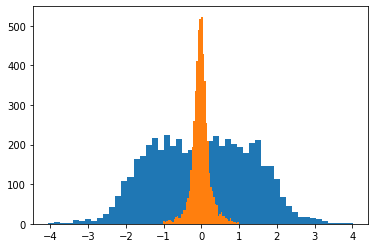

In [13]:
_=plt.hist(gt_nooutliers,bins=50)
_=plt.hist(fmri_nooutliers,bins=50)

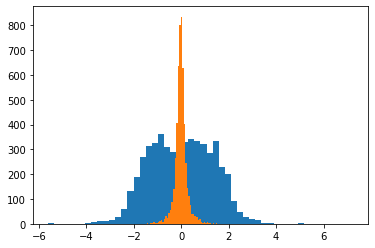

In [14]:
skew_idx = np.argsort(gt_nooutliers)
_=plt.hist(gt_skew,bins=50)
_=plt.hist(fmri_skew,bins=50)

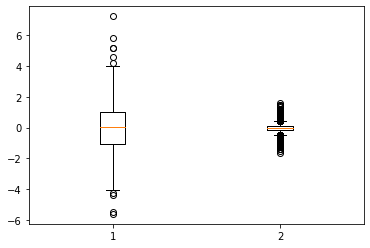

In [15]:
_ = plt.boxplot([gt_skew,fmri_skew])

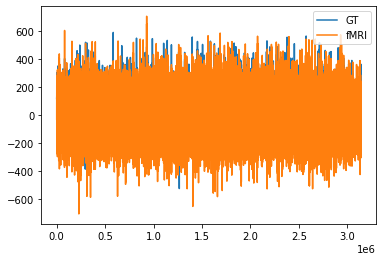

In [49]:
idx = 800
gt_data = gt_norm[skew_idx].flatten()
fmri_data = fmri_norm[skew_idx].flatten()
plt.plot(gt_data+120,label="GT")
plt.plot(fmri_data,label="fMRI")
plt.legend(loc="upper right")

In [11]:
# here we assume that the two distributions add
with pm.Model() as multi_noise:
    sigma1 = pm.Uniform('sigma1',0,20)
    ampl_noise = pm.Uniform('ampl_noise',0,5)
    
    fmri_observed = pm.Normal('fmri_observed',
                              mu=gt1_data,
                              sigma=np.sqrt(sigma1**2+ampl_noise**2*gt1_data**2), observed=fmri1_data)

    posterior_2 = pm.sample()

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ampl_noise, sigma1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 381 seconds.


In [ ]:
#pm.traceplot(posterior_2)

In [12]:
pm.summary(posterior_2)

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
sigma1,11.081,0.012,11.059,11.102,0.0,0.0,2469.0,2469.0,2470.0,2529.0,1.0
ampl_noise,0.533,0.004,0.526,0.540,0.0,0.0,2672.0,2672.0,2667.0,2868.0,1.0


In [13]:
# now we want to see what are the contributions to the noise
# here we assume that the multiplicative noise is prop to delta_S
sig = np.mean(posterior_2['sigma1'])
amp_noise = np.mean(posterior_2['ampl_noise'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)*gt1_data**2)/len(gt1_data))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(gt1_data))
print("sigma thermal normalized error",np.std(posterior_2['sigma1'])/np.std(gt1_data))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(fmri1_data-gt1_data))
print("sigma GT:",np.std(gt1_data))
print("signal to noise ratio:",np.std(gt1_data)**2/(sigma_mult**2+sig**2))
print("sigma multi/thermal:",sigma_mult**2/sig_total**2)

sigma mult: 3.7972028212504743
sigma thermal: 11.08126273902998
sigma thermal normalized 1.5554598798574362
sigma thermal normalized error 0.0016182433549005537
sigma total noise fitted: 11.713800969673624
sigma total (fmri-gt): 11.690086562190185
sigma GT: 7.124107077609497
signal to noise ratio: 0.36988370198592513
sigma multi/thermal: 0.10508286585950365


In [33]:
# same analysis for multiplicative noise prop to S
sig = np.mean(posterior_2['sigma1'])
amp_noise = np.mean(posterior_2['ampl_noise'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)*(gt1_mean_data**2)/len(gt1_data)))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(gt1_data))
print("sigma thermal normalized error",np.std(posterior_2['sigma1'])/np.std(gt1_data))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(fmri1_data-gt1_data))
print("sigma GT:",np.std(gt1_data))
print("sigma fmri:",np.std(fmri1_data))
print("sigma fmri/sigma GT:",np.std(fmri1_data)/np.std(gt1_data))
print("signal to noise ratio:",np.std(gt1_mean_data)**2/(sigma_mult**2+sig**2))
print("sigma multi/total:",sigma_mult**2/sig_total**2)
print("sigma multi/thermal:",sigma_mult**2/sig**2)

sigma mult: 389.74202500864027
sigma thermal: 11.08126273902998
sigma thermal normalized 1.5554598798574362
sigma thermal normalized error 0.0016182433549005537
sigma total noise fitted: 389.89952608553784
sigma total (fmri-gt): 11.690086562190185
sigma GT: 7.124107077609497
sigma fmri: 13.337594002818784
sigma fmri/sigma GT: 1.8721776438113604
signal to noise ratio: 0.0491649346088918
sigma multi/total: 0.9991922572106535
sigma multi/thermal: 1237.0178606226664


In [29]:
#lets do a test and average the data and see how the result changes
split_num = 100
print(gt1_data.shape)
print(fmri1_data.shape)
gt1_split = np.array(np.split(gt1_data,split_num))
gt1_avg = np.mean(gt1_split,axis=0)
fmri1_split = np.array(np.split(fmri1_data,split_num))
fmri1_avg = np.mean(fmri1_split,axis=0)
gt1_mean_split = np.array(np.split(gt1_mean_data,split_num))
gt1_mean_avg = np.mean(gt1_mean_split,axis=0)

(673800,)
(673800,)


In [27]:
# here we assume that the two distributions add
with pm.Model() as multi_noise:
    sigma1 = pm.Uniform('sigma1',0,20)
    ampl_noise = pm.Uniform('ampl_noise',0,5)
    
    fmri_observed = pm.Normal('fmri_observed',
                              mu=gt1_avg,
                              sigma=np.sqrt(sigma1**2+ampl_noise**2*gt1_avg**2), observed=fmri1_avg)

    posterior_avg = pm.sample()

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ampl_noise, sigma1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 70 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6504466823675928, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [34]:
# now we want to see what are the contributions to the noise
# here we assume that the multiplicative noise is prop to delta_S
sig = np.mean(posterior_avg['sigma1'])
amp_noise = np.mean(posterior_avg['ampl_noise'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)*gt1_avg**2)/len(gt1_avg))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(gt1_avg))
print("sigma thermal normalized error",np.std(posterior_avg['sigma1'])/np.std(gt1_avg))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(fmri1_avg-gt1_avg))
print("sigma GT:",np.std(gt1_avg))
print("sigma fmri:",np.std(fmri1_avg))
print("sigma fmri/sigma GT:",np.std(fmri1_avg)/np.std(gt1_avg))
print("signal to noise ratio:",np.std(gt1_avg)**2/(sigma_mult**2+sig**2))
print("sigma multi/thermal:",sigma_mult**2/sig_total**2)

sigma mult: 0.1385185464106567
sigma thermal: 1.1210180556540672
sigma thermal normalized 1.6012254162984045
sigma thermal normalized error 0.017051317674159003
sigma total noise fitted: 1.1295436551112785
sigma total (fmri-gt): 1.1303315036530848
sigma GT: 0.7001000884969428
sigma fmri: 1.2829961464108357
sigma fmri/sigma GT: 1.8325896075307213
signal to noise ratio: 0.3841618413133606
sigma multi/thermal: 0.015038683182022762


In [31]:
# now we want to see what are the contributions to the noise
# here we assume that the multiplicative noise is prop to delta_S
sig = np.mean(posterior_avg['sigma1'])
amp_noise = np.mean(posterior_avg['ampl_noise'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)*gt1_mean_avg**2)/len(gt1_avg))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(gt1_avg))
print("sigma thermal normalized error",np.std(posterior_avg['sigma1'])/np.std(gt1_avg))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(fmri1_avg-gt1_avg))
print("sigma GT:",np.std(gt1_avg))
print("signal to noise ratio:",np.std(gt1_avg)**2/(sigma_mult**2+sig**2))
print("sigma multi/thermal:",sigma_mult**2/sig_total**2)

sigma mult: 143.66168369910162
sigma thermal: 1.1210180556540672
sigma thermal normalized 1.6012254162984045
sigma thermal normalized error 0.017051317674159003
sigma total noise fitted: 143.66605738566722
sigma total (fmri-gt): 1.1303315036530848
sigma GT: 0.7001000884969428
signal to noise ratio: 2.3747173094477396e-05
sigma multi/thermal: 0.9999391140806646


In [43]:
# now include all traces
gt1_data = gt1_norm.flatten()
fmri1_data = fmri1_norm.flatten()
print(gt1_data.shape)

(943800,)


In [44]:
# here we assume that the two distributions add
with pm.Model() as multi_noise:
    sigma1 = pm.Uniform('sigma1',0,20)
    ampl_noise = pm.Uniform('ampl_noise',0,5)
    
    fmri_observed = pm.Normal('fmri_observed',
                              mu=gt1_data,
                              sigma=np.sqrt(sigma1**2+ampl_noise**2*gt1_data**2), observed=fmri1_data)

    posterior_3 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ampl_noise, sigma1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 469 seconds.


In [ ]:
#pm.traceplot(posterior['sigma1'])

In [ ]:
pm.summary(posterior_3)

In [45]:
# now we want to see what are the contributions to the noise
sig = np.mean(posterior_3['sigma1'])
amp_noise = np.mean(posterior_3['ampl_noise'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)*gt1_data**2)/len(gt1_data))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(gt1_data))
print("sigma thermal normalized error",np.std(posterior_3['sigma1'])/np.std(gt1_data))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(fmri1_data-gt1_data))
print("sigma GT:",np.std(gt1_data))
print("signal to noise ratio:",np.std(gt1_data)**2/(sigma_mult**2+sig**2))
print("sigma multi/thermal:",sigma_mult**2/sig_total**2)

sigma mult: 4.585820959011985
sigma thermal: 11.230592443167323
sigma thermal normalized 1.7099640850292137
sigma thermal normalized error 0.0014975403055149667
sigma total noise fitted: 12.130785650263572
sigma total (fmri-gt): 12.060876744703936
sigma GT: 6.567735861525685
signal to noise ratio: 0.29312543102138067
sigma multi/thermal: 0.14290793113450082


In [ ]:
# here we assume that the two distributions add
with pm.Model() as multi_noise:
    sigma1 = pm.Uniform('sigma1',0,20)
    ampl_noise = pm.Uniform('ampl_noise',0,5)
    
    fmri_observed = pm.Normal('fmri_observed',
                              mu=gt_data,
                              sigma=np.sqrt(sigma1**2+ampl_noise**2*gt_data**2), observed=fmri_data)

    posterior_3 = pm.sample()

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ampl_noise, sigma1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1583 seconds.


In [ ]:
pm.summary(posterior_3)

In [ ]:
# now we want to see what are the contributions to the noise
sig = np.mean(posterior_3['sigma1'])
amp_noise = np.mean(posterior_3['ampl_noise'])
amp_signal = np.mean(posterior_3['ampl_signal'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)**amp_signal**2*gt_data**2)/len(gt_data))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(amp_signal*gt_data))
print("sigma thermal normalized error",np.std(posterior_3['sigma1'])/np.std(amp_signal*gt_data))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(cleaned_data-amp_signal*gt_data))
print("sigma GT:",np.std(amp_signal*gt_data))
print("signal to noise ratio:",np.std(amp_signal*gt_data)**2/(sigma_mult**2+sig**2))
print("sigma multi/total noise:",sigma_mult**2/sig_total**2)
print("sigma thermal/total noise:",sig**2/sig_total**2)

In [6]:
gt1 = gt[:1573]
fmri1 = fmri[:1573]
gt1_mean = np.mean(gt1,axis=1)
fmri1_mean = np.mean(fmri1,axis=1)
avg_mean = (gt1_mean+fmri1_mean)/2
gt1_norm = gt1 * avg_mean[:,np.newaxis]/gt1_mean[:,np.newaxis]
fmri1_norm = fmri1 * avg_mean[:,np.newaxis]/fmri1_mean[:,np.newaxis]
gt_data = gt1_norm.flatten()
fmri_data = fmri1_norm.flatten()

In [10]:
# here we assume that the two distributions add
with pm.Model() as multi_noise:
    sigma1 = pm.Uniform('sigma1',0,20)
    ampl_noise = pm.Uniform('ampl_noise',0,5)
    
    fmri_observed = pm.Normal('fmri_observed',
                              mu=gt_data,
                              sigma=np.sqrt(sigma1**2+ampl_noise**2*gt_data**2), observed=fmri_data)

    posterior_3 = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ampl_noise, sigma1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3460 seconds.
The acceptance probability does not match the target. It is 0.9987810040178703, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9703491115392379, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8868476306998692, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [13]:
# now we want to see what are the contributions to the noise
sig = np.mean(posterior_3['sigma1'])
amp_noise = np.mean(posterior_3['ampl_noise'])
sigma_mult = np.sqrt(np.sum((amp_noise**2)*gt_data**2)/len(gt_data))
sig_total = np.sqrt(sigma_mult**2+sig**2)
print("sigma mult:",sigma_mult)
print("sigma thermal:",sig)
print("sigma thermal normalized",sig/np.std(gt_data))
print("sigma thermal normalized error",np.std(posterior_3['sigma1'])/np.std(gt_data))
print("sigma total noise fitted:",np.sqrt(sigma_mult**2+sig**2))
print("sigma total (fmri-gt):",np.std(fmri_data-gt_data))
print("sigma GT:",np.std(gt_data))
print("signal to noise ratio:",np.std(gt_data)**2/(sigma_mult**2+sig**2))
print("sigma multi/thermal:",sigma_mult**2/sig_total**2)

sigma mult: 10.492626595989764
sigma thermal: 5.994790390946701
sigma thermal normalized 0.06896484399907225
sigma thermal normalized error 0.0008096675980195008
sigma total noise fitted: 12.084400056033342
sigma total (fmri-gt): 12.086837032031285
sigma GT: 86.92530923476525
signal to noise ratio: 51.7418914174502
sigma multi/thermal: 0.7539078182530277


In [14]:
pm.summary(posterior_3)

/opt/miniconda3/envs/pymc3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
sigma1,5.995,0.07,5.860,6.124,0.003,0.002,638.0,637.0,642.0,709.0,1.01
ampl_noise,0.014,0.00,0.014,0.014,0.000,0.000,622.0,622.0,623.0,707.0,1.01


In [3]:
print(np.sqrt(0.75))

0.8660254037844386
